In [1]:
import matplotlib.pyplot as plt
import numpy as np

from bandit import Bandits_one
from mab import EpsilonGreedy

# Part 2 - Report

### Exercise 8

In [2]:
env = Bandits_one()

experiments = 20
episodes = 1000

mean_cumulative_regret = {
    "epsilon-greedy": [0] * episodes,
    "decaying epsilon-greedy": [0] * episodes,
    "ucb": [0] * episodes,
}

First we run the Epsilon-greedy MAB algorithm on the environment for 1000 episodes, 20 times.

In [3]:
# Epsilon-greedy model
for _ in range(experiments):
    agent = EpsilonGreedy()
    observation, reward, terminated, truncated, info = env.reset()

    cumulative_reward = 0
    for episode in range(1, episodes+1):
        action = agent.sample()
        observation, reward, terminated, truncated, info = env.step(action)

        agent.update(action, reward)

        cumulative_reward += reward
        mean_cumulative_regret["epsilon-greedy"][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments

        if terminated or truncated:
            observation, reward, terminated, truncated, info = env.reset()

Then we run decaying Epsilon-greedy model the same number of times.

In [4]:
# Decaying epsilon-greedy model
for _ in range(experiments):
    agent = EpsilonGreedy(alpha=0.99)
    observation, reward, terminated, truncated, info = env.reset()

    cumulative_reward = 0
    for episode in range(1, episodes+1):
        action = agent.sample()
        observation, reward, terminated, truncated, info = env.step(action)

        agent.update(action, reward)

        cumulative_reward += reward
        mean_cumulative_regret["decaying epsilon-greedy"][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments

        if terminated or truncated:
            observation, reward, terminated, truncated, info = env.reset()

Plot the different models' cumulative regret.

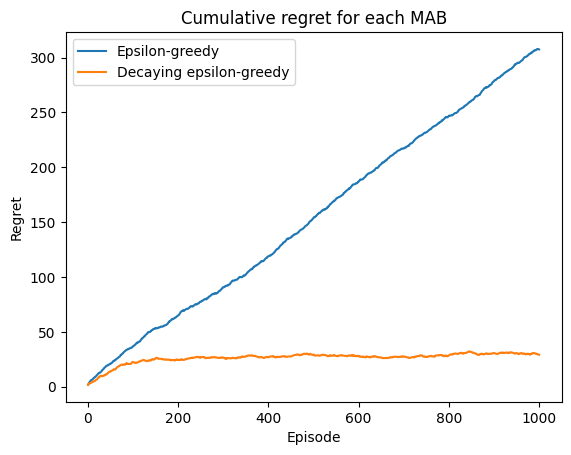

In [5]:
plt.plot(np.arange(1, episodes+1), mean_cumulative_regret["epsilon-greedy"], label="Epsilon-greedy")
plt.plot(np.arange(1, episodes+1), mean_cumulative_regret["decaying epsilon-greedy"], label="Decaying epsilon-greedy")

plt.title("Cumulative regret for each MAB")
plt.ylabel("Regret")
plt.xlabel("Episode")

plt.legend()
plt.show()